In [1]:
from IPython.display import display

from sympy import I, Rational, ratsimp, posify

import sympy

R_s = sympy.symbols("R_s", real=True)
R_rec = sympy.symbols("R_rec", real=True)
R_tr = sympy.symbols("R_tr", real=True)
R_ct = sympy.symbols("R_ct", real=True)

w = sympy.symbols("omega", real=True)
C_m = sympy.symbols("C_m", real=True)
C_dl = sympy.symbols("C_dl", real=True)

eq1 = 1 / R_ct + w * C_dl * I
display(eq1)
eq2 = R_tr + 1 / eq1
display(eq2)

eq3 = 1 / eq2
display(eq3)
eq4 = 1 / R_rec + w * C_m * I + eq3
display(eq4)

eq_fin = R_s + 1 / eq4
print("\n\n")
print("Final equation : ")
display(eq_fin)

I*C_dl*omega + 1/R_ct

R_tr + 1/(I*C_dl*omega + 1/R_ct)

1/(R_tr + 1/(I*C_dl*omega + 1/R_ct))

I*C_m*omega + 1/(R_tr + 1/(I*C_dl*omega + 1/R_ct)) + 1/R_rec




Final equation : 


R_s + 1/(I*C_m*omega + 1/(R_tr + 1/(I*C_dl*omega + 1/R_ct)) + 1/R_rec)

In [2]:
eq_fin = eq_fin.subs(R_s, 10)
eq_fin = eq_fin.subs(R_tr, 10)
eq_fin = eq_fin.subs(R_ct, 100)
eq_fin = eq_fin.subs(R_rec, 100)
eq_fin = eq_fin.subs(C_m, 18.0e-9)

eq_fin

10 + 1/(1.8e-8*I*omega + 1/100 + 1/(10 + 1/(I*C_dl*omega + 1/100)))

In [3]:
from sympy import re, im
from numpy import pi

def calculate(w_input, C_dl_input) : 
    global eq_fin
    w_input = 2 * w_input * pi

    real_term = re(eq_fin)
    real_term = real_term.subs(w, w_input)
    real_term = real_term.subs(C_dl, C_dl_input)

    imaginary_term = im(eq_fin)
    imaginary_term = imaginary_term.subs(w, w_input)
    imaginary_term = imaginary_term.subs(C_dl, C_dl_input)

    return real_term, -1 * imaginary_term


In [4]:
import numpy as np

def calc_range(w_input, C_dl_input, w_num, c_num) : 
    
    w_input = np.linspace(w_input[0], w_input[1], w_num)
    C_dl_input = np.linspace(C_dl_input[0], C_dl_input[1], c_num)

    real_arr = np.zeros(shape=(c_num, w_num), dtype=float)
    img_arr = np.zeros(shape=(c_num, w_num), dtype=float)

    for row, c_dl in enumerate(C_dl_input) :

        for column, w in enumerate(w_input) : 
            real, imaginary = calculate(w, c_dl)
            try : 
                real_arr[row, column] = real
                img_arr[row, column] = imaginary
            except : 
                print(real, imaginary)
                print(row, column)
                print(w, c_dl)
                raise TypeError

    return real_arr, img_arr, C_dl_input


(5, 1000) (5, 1000) (5,)


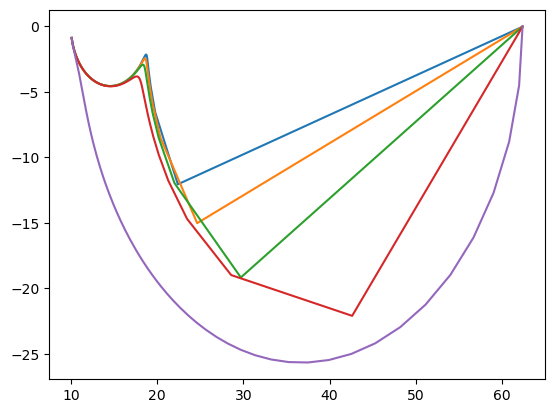

In [28]:
import matplotlib.pyplot as plt

x_range, y_range, c_range = calc_range(w_input=[1, 1.0e+7], C_dl_input=[1.0e-6, 1.0e-8], w_num=1000, c_num=5)

print(x_range.shape, y_range.shape, c_range.shape)

for x, y, c_dl in zip(x_range, y_range, c_range) : 
    plt.plot(x, y, label="C_dl : {:.1e}".format(c_dl))
# plt.legend()
plt.show()

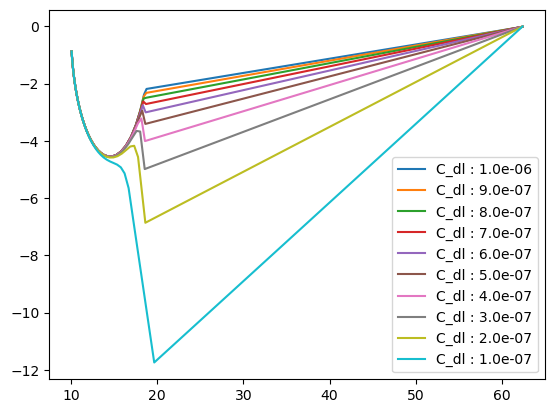

In [21]:
for x, y, c_dl in zip(x_range, y_range, c_range) : 
    plt.plot(x, y, label="C_dl : {:.1e}".format(c_dl))
plt.legend()
plt.show()


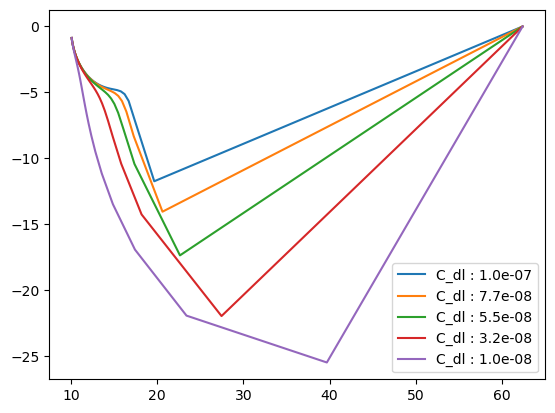

In [26]:
for x, y, c_dl in zip(x_range, y_range, c_range) : 
    plt.plot(x, y, label="C_dl : {:.1e}".format(c_dl))
plt.legend()
plt.show()
